# Clusterização - Kmeans

Aplicação do algoritmo Kmeans em algumas bases publicas.

In [14]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### Carregamento dos dados

Iremos usar o dataset IRIS esse conjunto traz 150 amostras de três espécies de Iris (Iris setosa, Iris virginica e Iris versicolor) que, apesar de muito semelhantes, são passíveis de distinção usando um modelo desenvolvido pelo biólogo e estatístico Ronald Fisher.

In [2]:
iris = datasets.load_iris()

In [3]:
# ajustando para dataframe
iris_data = iris.data
iris_target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [4]:
iris_data[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [5]:
iris_target[:2]

array([0, 0])

In [6]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
np.unique(iris_target)

array([0, 1, 2])

In [8]:
# convertendo em dataframe
df_base = pd.DataFrame(data=iris_data, columns=feature_names)
# df_base['target'] = iris_target
df_base.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### EDA

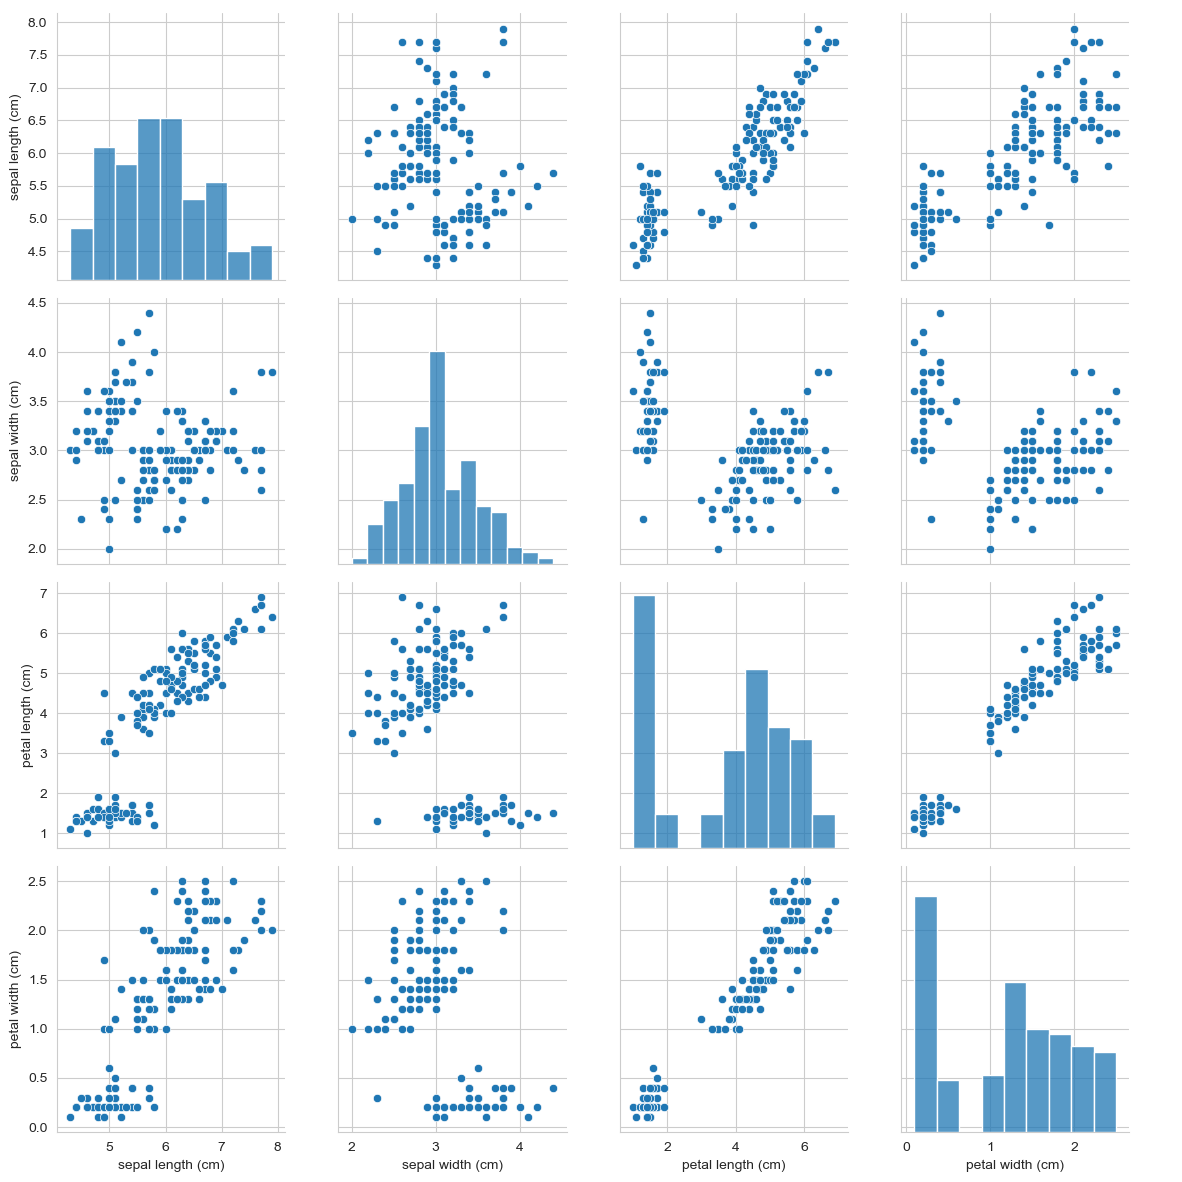

In [22]:
# visualização
sns.set_style("whitegrid")
sns.pairplot(df_base,height=3, aspect=1)
plt.show()

In [23]:
df_base.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


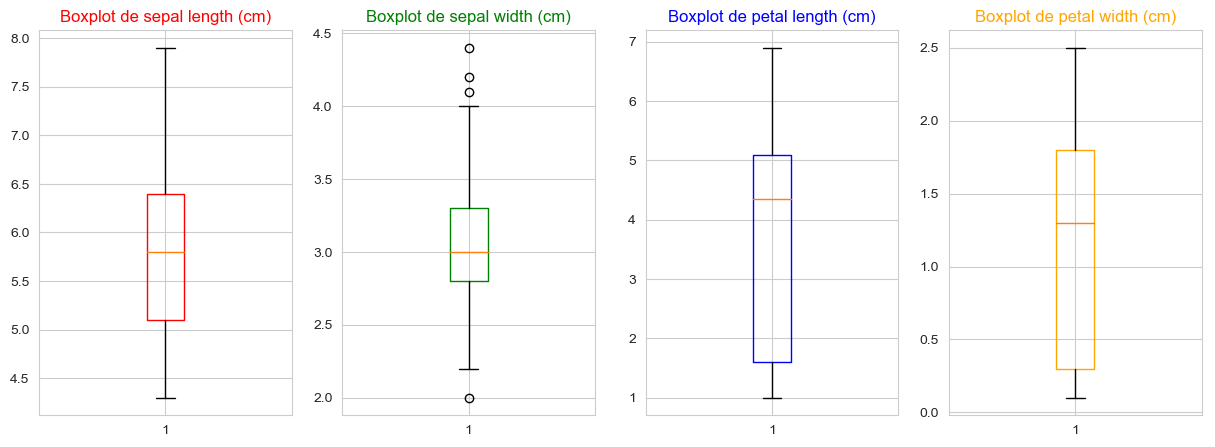

In [32]:
# Obtendo o número de colunas no DataFrame
num_cols = len(df_base.columns)

# Definindo as cores para os boxplots (vermelho, verde e azul)
colors = ['red', 'green', 'blue','orange']

# Criando subplots para os boxplots
fig, axs = plt.subplots(1, num_cols, figsize=(15, 5))

# Iterando sobre cada coluna e desenhando o boxplot correspondente
for i, (col, color) in enumerate(zip(df_base.columns, colors)):
    axs[i].boxplot(df_base[col], boxprops=dict(color=color))
    axs[i].set_title(f'Boxplot de {col}',color=color)

plt.show()

## Kmeans

In [33]:
from sklearn.cluster import KMeans

In [42]:
# define o modelo
model =  KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

In [43]:
# fita o modelo model
yhat =model.fit_predict(df_base)

c:\Users\gilbe\anaconda3\envs\fatec_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [47]:
yhat[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
# adicionando a coluna do dataframe
df_resultados = df_base.copy()
df_resultados["grupo"] = yhat
df_resultados.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),grupo
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1


In [44]:
# Quantidade de clusters
clusters = np.unique(yhat)
clusters

array([0, 1, 2])

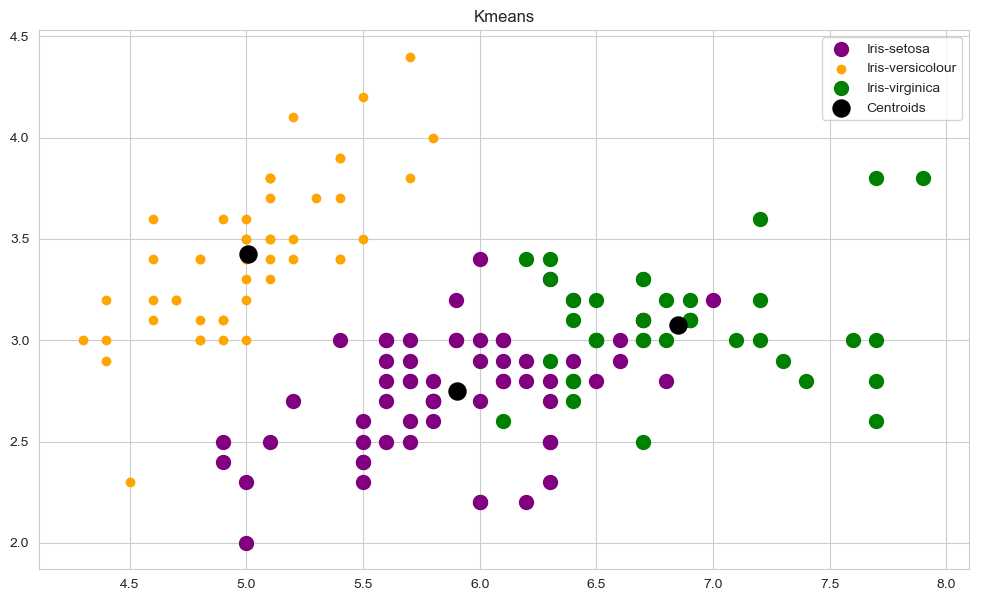

In [59]:
# visualizando
# lembrando que aqui temos 4 dimensoes, acabamos escolhendo apenas duas para ver
# futuramente iremos ver como podemos fazer a reducao de dimensionalidade
plt.figure(figsize=(12, 7))
plt.scatter(df_resultados.loc[df_resultados["grupo"] == 0, "sepal length (cm)"],
            df_resultados.loc[df_resultados["grupo"] == 0, "sepal width (cm)"],
              s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df_resultados.loc[df_resultados["grupo"] == 1, "sepal length (cm)"],
            df_resultados.loc[df_resultados["grupo"] == 1, "sepal width (cm)"],
            c = 'orange', label = 'Iris-versicolour')
plt.scatter(df_resultados.loc[df_resultados["grupo"] == 2, "sepal length (cm)"],
            df_resultados.loc[df_resultados["grupo"] == 2, "sepal width (cm)"],
            s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 150, c = 'black', label = 'Centroids')
plt.title("Kmeans")
plt.legend()
plt.show()

### criterio de Elbow

na pratica não sabemos a principio a quantidade  de clusters, conforme visto em sala uma das formas de resolver isso é usando o criterio do cotovelo(Elbow).

In [68]:
df_elbow = pd.DataFrame()
for i in range(1, 11):

    # instancia o modelo
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

    # fit do modelo
    kmeans.fit(df_base)

    # pegamos a soma das distancias quadraticas
    df_elbow = pd.concat([df_elbow,pd.DataFrame({"nclusters":[i],"distancia":[kmeans.inertia_]})],ignore_index=True)
    

c:\Users\gilbe\anaconda3\envs\fatec_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gilbe\anaconda3\envs\fatec_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gilbe\anaconda3\envs\fatec_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gilbe\anaconda3\envs\fatec_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: User

In [69]:
df_elbow.head()

,nclusters,distancia
0,1,681.370600
1,2,152.347952
2,3,78.851441
3,4,57.228473
4,5,46.446182


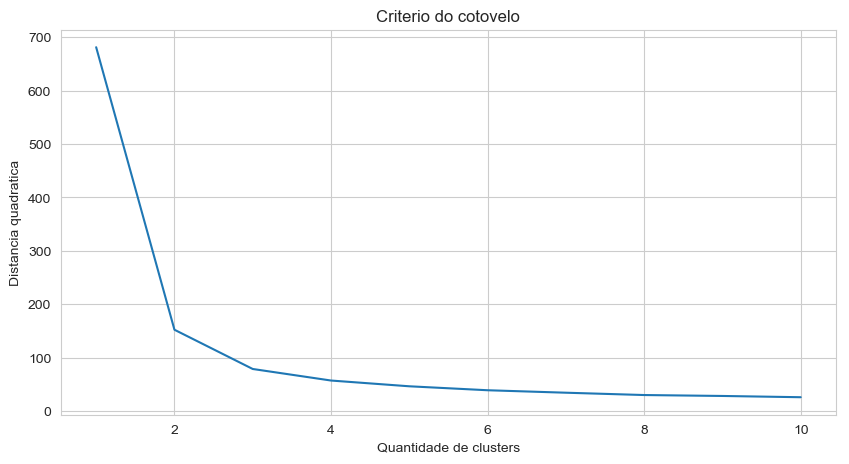

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(df_elbow["nclusters"], df_elbow["distancia"])
plt.title('Criterio do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Distancia quadratica')
plt.show()

## Mini batch K-means

Nos casos em que o volume de dados é grande o uso do k-means tradicional pode levar muito tempo devido ao intenso uso de calculos das novas posicoes de cada ponto em relação aos centroides. Nestes casos podemos usar o mini bacth Kmeans que calcula as novas posições das instâncias apenas para uma parte dos dados (mini batch) e não para toda a base.

In [72]:
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans

In [73]:
# vamos gerar um dataset maior, para compara-lo com o 
# kmeans tradicional
# define dataset
df_base2, _ = make_classification(n_samples=10000,
                                  n_features=2, 
                                  n_informative=2, 
                                  n_redundant=0, 
                                  n_clusters_per_class=1, 
                                  random_state=4)

In [76]:
df_base2 = pd.DataFrame(df_base2,columns=["variavel1","variavel2"])
df_base2.head(4)

,variavel1,variavel2
0,-0.039869,-0.401509
1,1.509359,-1.008493
2,-1.756274,-1.096951
3,-1.624811,-1.369115


In [80]:
%%time
# instancia o modelo
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# fita o modelo model
yhat =kmeans.fit_predict(df_base2)

# adicionando a coluna do dataframe
df_resultados2 = df_base2.copy()
df_resultados2["grupo"] = yhat
df_resultados2.head(3)

CPU times: total: 4.06 s
Wall time: 631 ms


,variavel1,variavel2,grupo
0,-0.039869,-0.401509,0
1,1.509359,-1.008493,0
2,-1.756274,-1.096951,1


In [81]:
%%time
# agora mini batch
minibatchkmeans = MiniBatchKMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# fita o modelo model
yhat =minibatchkmeans.fit_predict(df_base2)

# adicionando a coluna do dataframe
df_resultados3 = df_base2.copy()
df_resultados3["grupo"] = yhat
df_resultados3.head(3)

CPU times: total: 2.38 s
Wall time: 643 ms


,variavel1,variavel2,grupo
0,-0.039869,-0.401509,0
1,1.509359,-1.008493,0
2,-1.756274,-1.096951,1


In [83]:
minibatchkmeans.cluster_centers_

array([[ 0.99128459, -0.96862067],
       [-1.08810505, -1.02800319]])

In [84]:
kmeans.cluster_centers_

array([[ 0.99010321, -0.97023442],
       [-1.08343473, -1.0229512 ]])

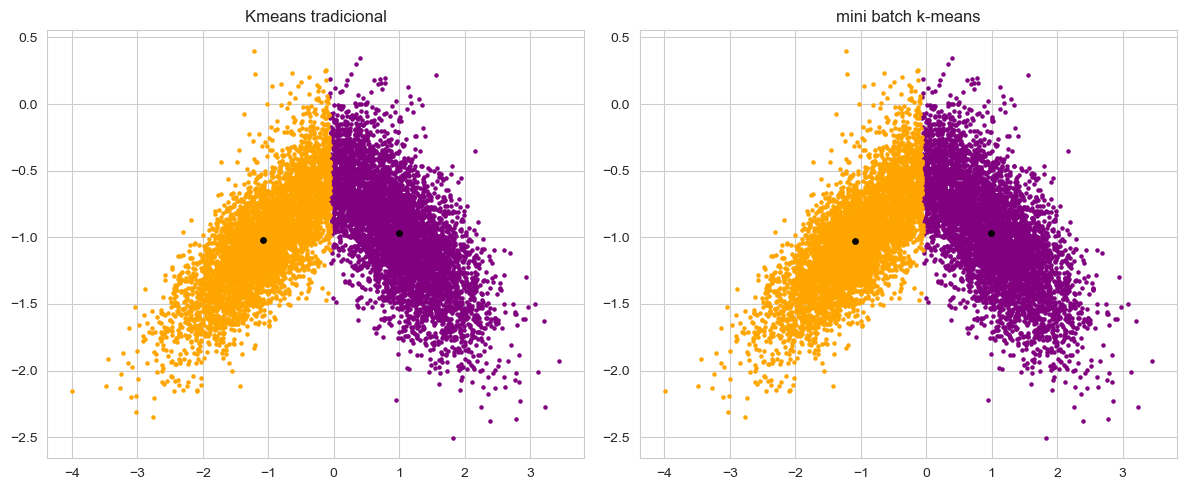

In [88]:
# visualização

# Criar a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatterplot 1
axs[0].scatter(df_resultados2.loc[df_resultados2["grupo"] == 0, "variavel1"],
               df_resultados2.loc[df_resultados2["grupo"] == 0, "variavel2"],
              s = 5, c = 'purple', label = 'grupo0')
axs[0].scatter(df_resultados2.loc[df_resultados2["grupo"] == 1, "variavel1"],
               df_resultados2.loc[df_resultados2["grupo"] == 1, "variavel2"],
              s = 5, c = 'orange', label = 'grupo1')
axs[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 15, c = 'black', label = 'Centroids')

axs[0].set_title('Kmeans tradicional')

# Scatterplot 2
axs[1].scatter(df_resultados3.loc[df_resultados3["grupo"] == 0, "variavel1"],
               df_resultados3.loc[df_resultados3["grupo"] == 0, "variavel2"],
              s = 5, c = 'purple', label = 'grupo0')
axs[1].scatter(df_resultados3.loc[df_resultados3["grupo"] == 1, "variavel1"],
               df_resultados3.loc[df_resultados3["grupo"] == 1, "variavel2"],
              s = 5, c = 'orange', label = 'grupo1')
axs[1].scatter(minibatchkmeans.cluster_centers_[:, 0], minibatchkmeans.cluster_centers_[:,1], 
            s = 15, c = 'black', label = 'Centroids')
axs[1].set_title('mini batch k-means')

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()
